In [47]:
# ! pip install shap
# ! pip install lime

In [49]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import shap
import lime
shap.initjs()

In [185]:
df=pd.read_csv("final_dataset.csv")

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

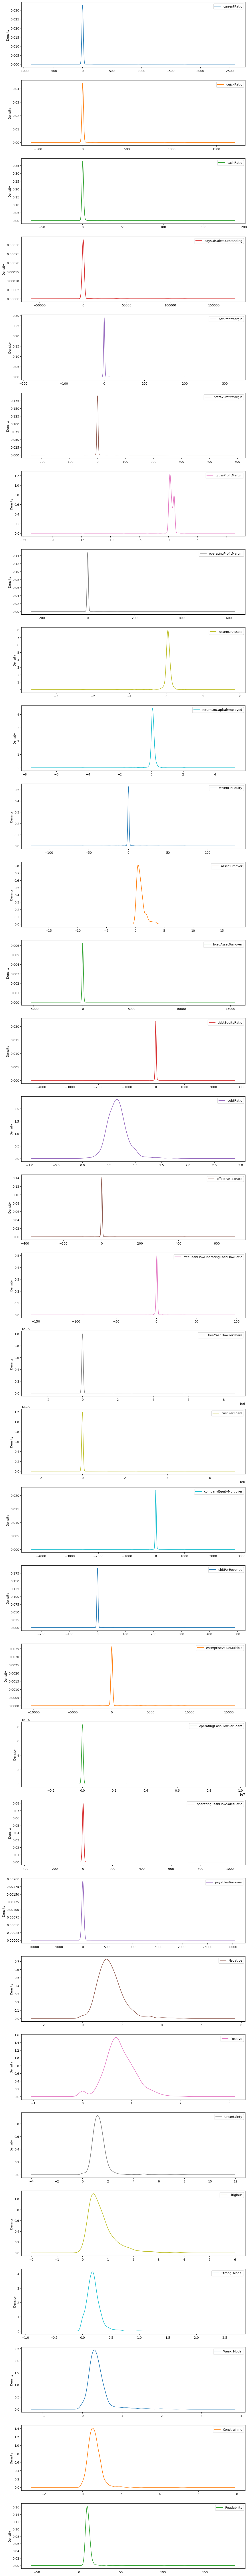

In [51]:
df.plot(kind="kde", 
        subplots=True, 
        figsize=(13,150), 
        sharex=False, 
        sharey=False)

In [52]:
df=pd.read_csv("final_dataset.csv")

In [53]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sector'] = label_encoder.fit_transform(df['Sector'])

label_encoder2 = LabelEncoder()
df['Symbol'] = label_encoder.fit_transform(df['Symbol'])


df['Rating'] = df['Rating'].apply(lambda x: 1 if x in ['AAA', 'BBB', 'AA', 'A'] else 0)

df.drop(["Name" , "Date" , "Rating Agency Name"] , axis = 1  , inplace = True)

In [54]:
X = df.drop(["Rating"] , axis = 1)
y = df["Rating"]


xTrain,xTest,yTrain,yTest=train_test_split(X,y,test_size=0.20,random_state=42)

In [108]:
# model=RandomForestClassifier()
# model.fit(xTrain,yTrain)
# pred=model.predict(xTest)
from lightgbm import LGBMClassifier
import lightgbm as lgb

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',        # Adjust this for multi-class
    'num_leaves': 255,            # Increased to handle large data
    'learning_rate': 0.01,        # Lower learning rate
    'n_estimators': 1000,         # More trees for larger datasets
    'max_depth': -1,              # Allow deeper trees
    'random_state': 42
}
model = lgb.LGBMClassifier(**params)
model.fit(xTrain, yTrain)
pred = model.predict(xTest)



[LightGBM] [Info] Number of positive: 725, number of negative: 466
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8676
[LightGBM] [Info] Number of data points in the train set: 1191, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.608732 -> initscore=0.441986
[LightGBM] [Info] Start training from score 0.441986
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [109]:
# creating an instance of the lime tabular explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(training_data=np.array(xTrain), feature_names=xTrain.columns, 
            class_names=[0, 1], mode='classification') 
    

explanation = lime_explainer.explain_instance(data_row=xTest.iloc[0], predict_fn=model.predict_proba, top_labels=2, num_features=25)

# printing out the explanation
explanation.show_in_notebook()
explanation.save_to_file("text.html")

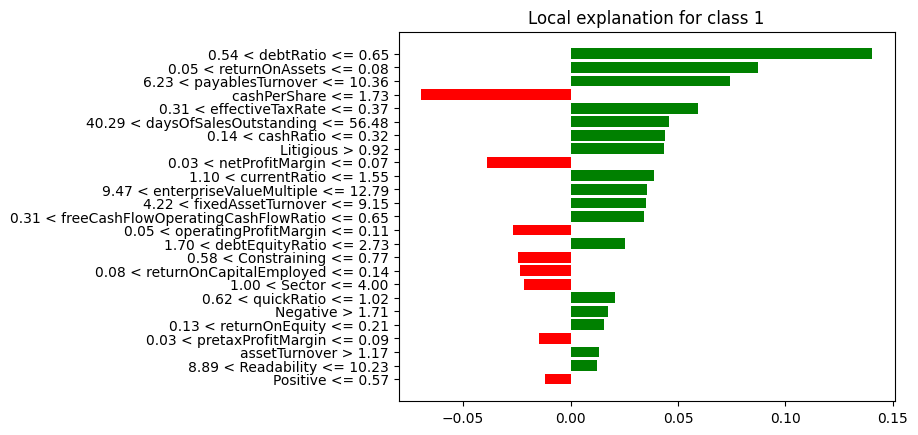

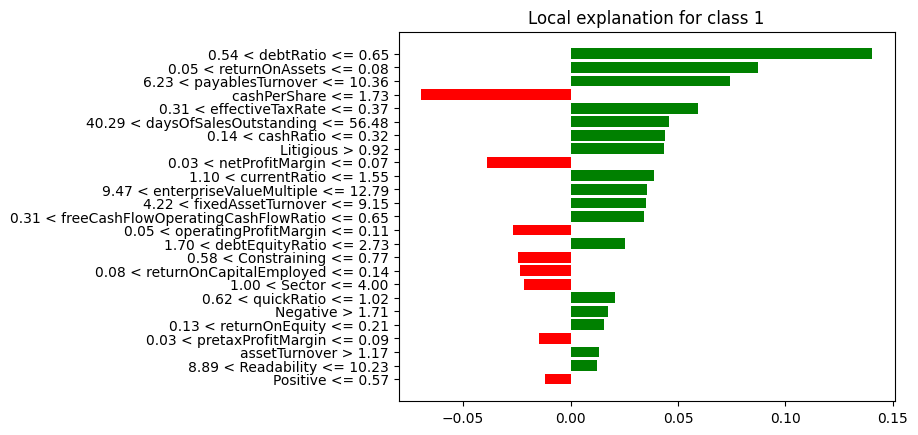

In [110]:
explanation.as_pyplot_figure()

In [111]:
#shape explainer for some error debug
shap_explaner=shap.Explainer(model)(xTest)
#calculating shap values
shap_value = shap.Explainer(model).shap_values(xTest)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


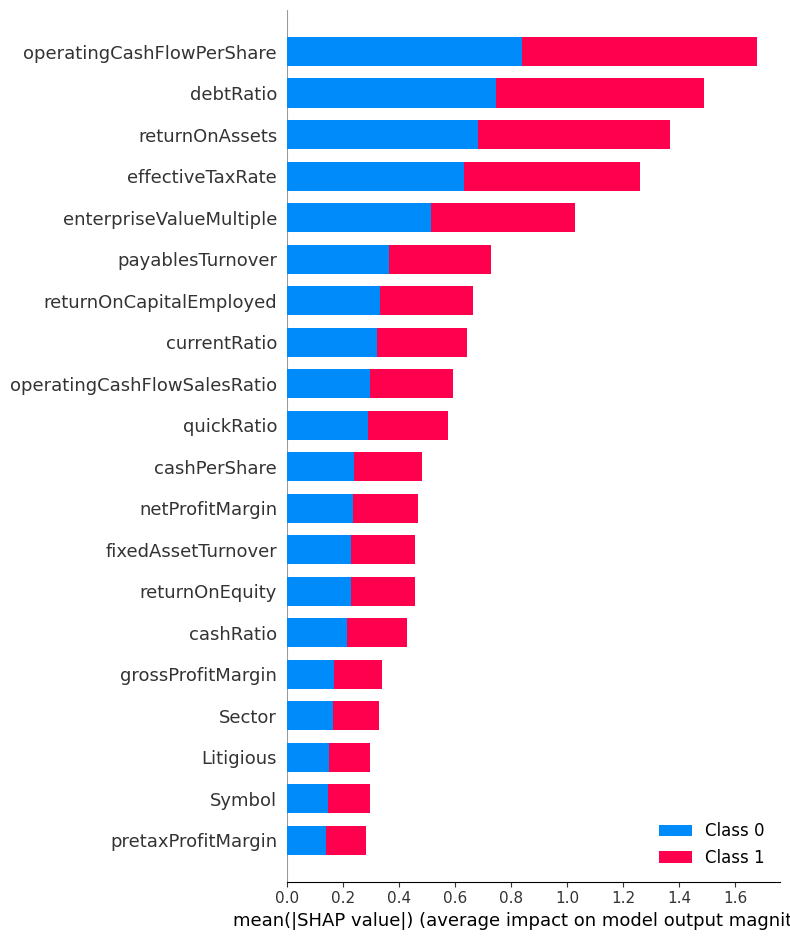

In [112]:
shap.summary_plot(shap_value, xTest)

In [157]:
len(shap_value)
shap.TreeExplainer(model).expected_value

array([1.41878915])

In [168]:
# xTrain.columns
shap_explaner

.values =
array([[[ 0.1243317 , -0.1243317 ],
        [ 0.10393409, -0.10393409],
        [ 0.10387699, -0.10387699],
        ...,
        [ 0.06362459, -0.06362459],
        [ 0.00850786, -0.00850786],
        [-0.10742422,  0.10742422]],

       [[-0.03265323,  0.03265323],
        [ 0.16011118, -0.16011118],
        [ 0.26903992, -0.26903992],
        ...,
        [-0.05172905,  0.05172905],
        [-0.31273768,  0.31273768],
        [ 0.13161368, -0.13161368]],

       [[-0.05652879,  0.05652879],
        [-0.33198071,  0.33198071],
        [-0.53230265,  0.53230265],
        ...,
        [-0.082939  ,  0.082939  ],
        [ 0.04034538, -0.04034538],
        [-0.00275876,  0.00275876]],

       ...,

       [[-0.02909478,  0.02909478],
        [ 0.25359416, -0.25359416],
        [ 0.51491426, -0.51491426],
        ...,
        [ 0.10849454, -0.10849454],
        [ 0.01857529, -0.01857529],
        [-0.04006607,  0.04006607]],

       [[-0.0264259 ,  0.0264259 ],
        [ 0.30026

Explainer expected value: [1.41878915]


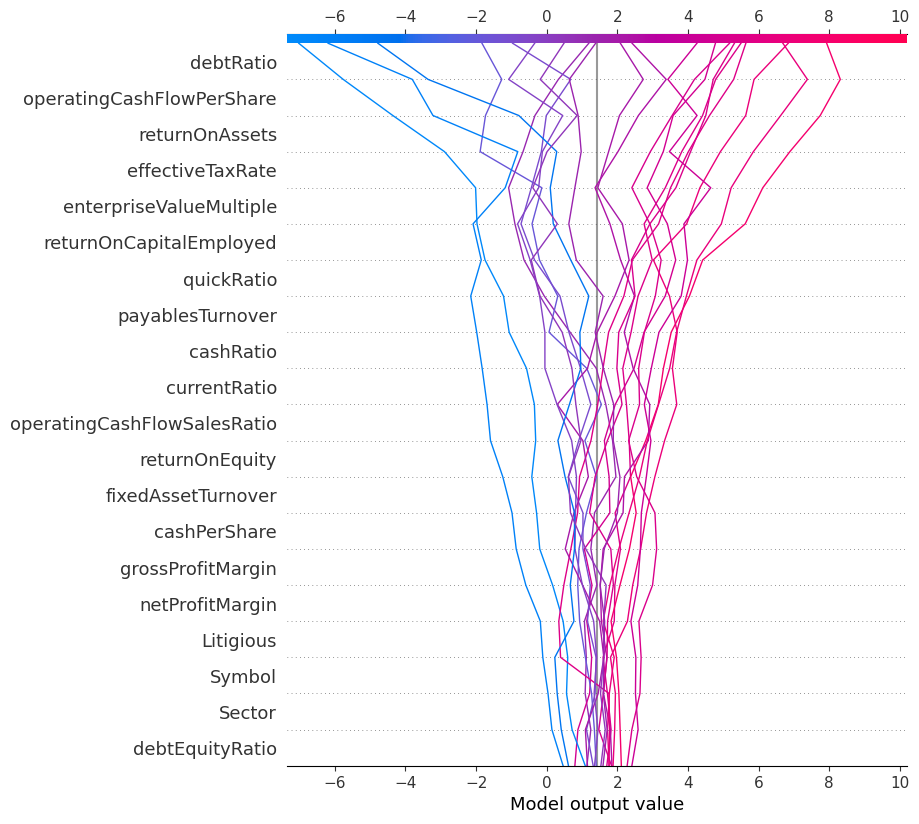

In [183]:
import warnings

explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

select = range(20)
features = xTest.iloc[select]
features_display = X.loc[features.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

shap.decision_plot(expected_value, shap_values, features_display)

In [184]:
shap.plots.force(shap.TreeExplainer(model).expected_value[0], shap_explaner.values[:,:,0], xTest.values[0])

In [116]:
# Force plot for single tuple
shap.plots.force(shap.TreeExplainer(model).expected_value[0], shap_explaner.values[1,:,1], xTest.values[4])

In [117]:
shap.TreeExplainer(model).expected_value

array([1.41878915])

In [126]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(xTest)
shap_values

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


[array([[ 0.1243317 ,  0.10393409,  0.10387699, ...,  0.06362459,
          0.00850786, -0.10742422],
        [-0.03265323,  0.16011118,  0.26903992, ..., -0.05172905,
         -0.31273768,  0.13161368],
        [-0.05652879, -0.33198071, -0.53230265, ..., -0.082939  ,
          0.04034538, -0.00275876],
        ...,
        [-0.02909478,  0.25359416,  0.51491426, ...,  0.10849454,
          0.01857529, -0.04006607],
        [-0.0264259 ,  0.30026718, -0.32917456, ...,  0.14121431,
          0.01023484, -0.01523459],
        [-0.17432737, -0.26011032, -0.4817238 , ..., -0.04745471,
          0.03054032,  0.19684767]]),
 array([[-0.1243317 , -0.10393409, -0.10387699, ..., -0.06362459,
         -0.00850786,  0.10742422],
        [ 0.03265323, -0.16011118, -0.26903992, ...,  0.05172905,
          0.31273768, -0.13161368],
        [ 0.05652879,  0.33198071,  0.53230265, ...,  0.082939  ,
         -0.04034538,  0.00275876],
        ...,
        [ 0.02909478, -0.25359416, -0.51491426, ..., -

Variable Importance Plot - Global Interpretation


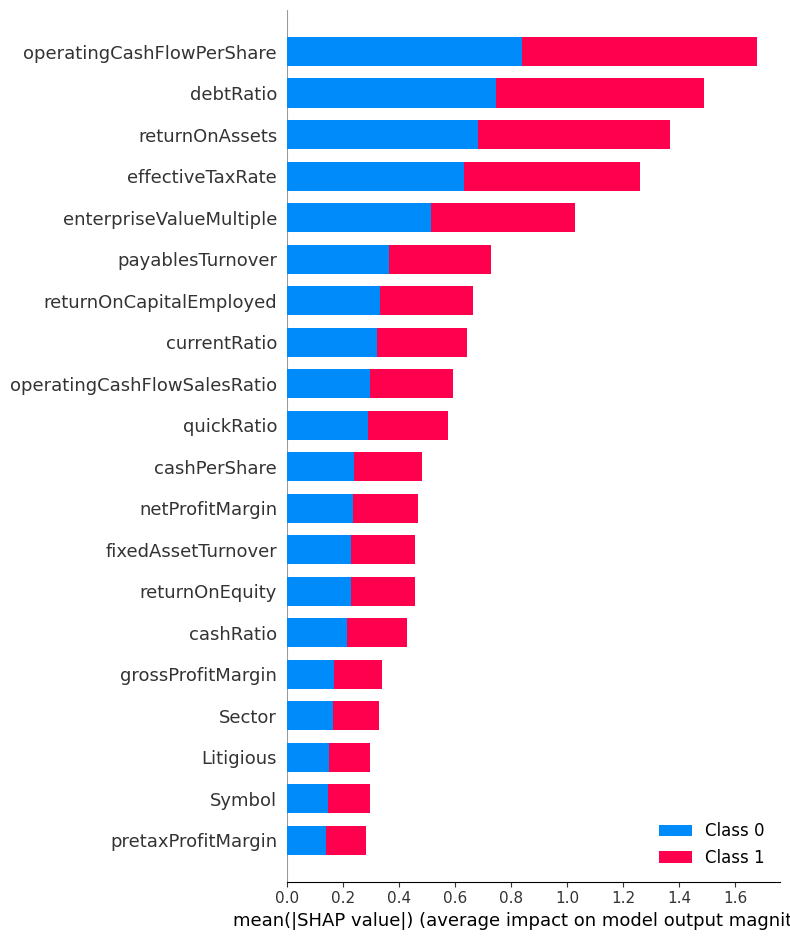

In [128]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, xTest)

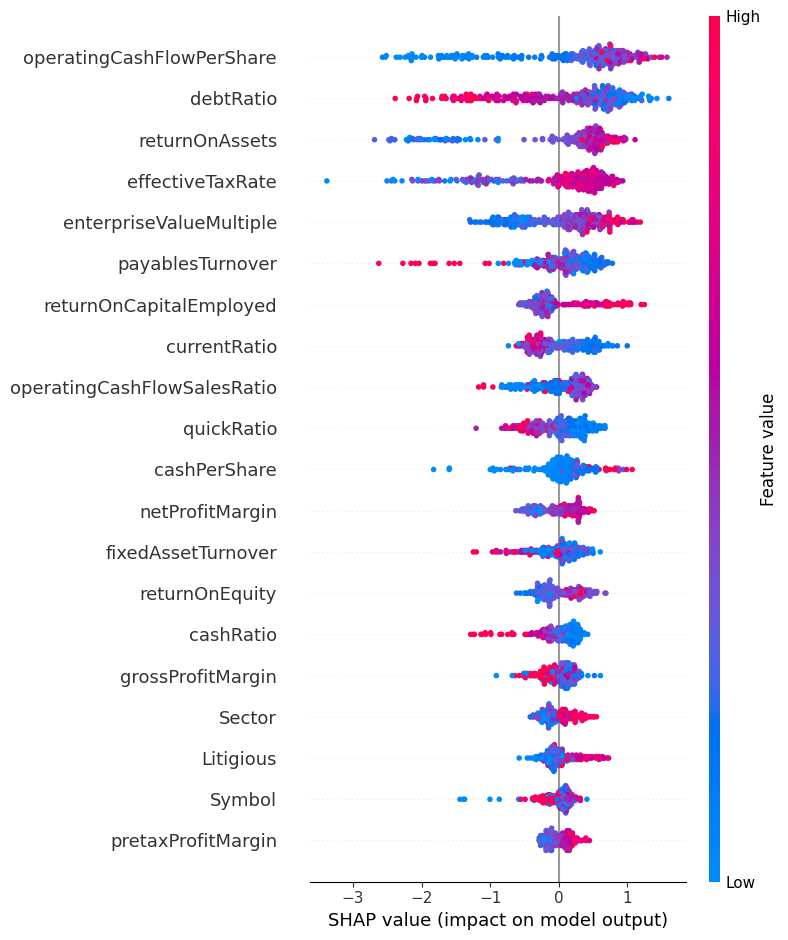

In [129]:
shap.summary_plot(shap_values[1], xTest)